In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import time

def plot_graph(graph, colors):
    G = nx.Graph(graph)
    node_colors = []
    for node in G.nodes():
        try:
            node_colors.append(colors[node])
        except KeyError:
            print("Čvor", node, "nema dodeljenu boju.")
            node_colors.append('gray')  # Postavljamo sivu boju za čvorove bez dodeljene boje
    nx.draw(G, with_labels=True, node_color=node_colors, cmap=plt.cm.rainbow, node_size=500)
    plt.show()


class ParticleColoring:
    def __init__(self, graph):
        self.graph = graph
        self.num_nodes = len(graph)
        self.colors = {node: None for node in graph}  # Početno, nijedan čvor nije obojen
        self.personal_best_colors = None
        self.personal_best_fitness = float('inf')  # Početna vrednost za najbolju ocenu
        
    def calculate_fitness(self):
        unique_colors = len(set(self.colors.values()))
        return unique_colors

    def update_position(self):
        for node in self.graph:
            neighbor_colors = {self.colors[neighbor] for neighbor in self.graph[node] if self.colors[neighbor] is not None}
            if self.colors[node] is None:
                available_colors = set(range(len(neighbor_colors) + 1)) - neighbor_colors
                self.colors[node] = min(available_colors)
                print("Čvor", node, "dodeljena boja:", self.colors[node])



    @classmethod
    def update_global_best(cls, personal_best_fitness, personal_best_colors):
        if personal_best_fitness < cls.swarm_best_fitness:
            cls.swarm_best_fitness = personal_best_fitness
            cls.swarm_best_colors = personal_best_colors.copy()

def pso_coloring(graph, swarm_size, num_iters):
    ParticleColoring.swarm_best_colors = None
    ParticleColoring.swarm_best_fitness = float('inf')
    
    swarm = [ParticleColoring(graph) for _ in range(swarm_size)]
    
    for i in range(num_iters):
        print("Iteracija", i + 1)
        for particle in swarm:
            particle.update_position()
            fitness = particle.calculate_fitness()
            if fitness < particle.personal_best_fitness:
                particle.personal_best_fitness = fitness
                particle.personal_best_colors = particle.colors.copy()
                ParticleColoring.update_global_best(fitness, particle.personal_best_colors)
    
        print("Best colors:", ParticleColoring.swarm_best_colors)
        print("Best fitness:", ParticleColoring.swarm_best_fitness)
    
    return ParticleColoring.swarm_best_colors, ParticleColoring.swarm_best_fitness


Iteracija 1
Čvor A dodeljena boja: 0
Čvor B dodeljena boja: 1
Čvor C dodeljena boja: 2
Čvor D dodeljena boja: 0
Čvor A dodeljena boja: 0
Čvor B dodeljena boja: 1
Čvor C dodeljena boja: 2
Čvor D dodeljena boja: 0
Čvor A dodeljena boja: 0
Čvor B dodeljena boja: 1
Čvor C dodeljena boja: 2
Čvor D dodeljena boja: 0
Čvor A dodeljena boja: 0
Čvor B dodeljena boja: 1
Čvor C dodeljena boja: 2
Čvor D dodeljena boja: 0
Čvor A dodeljena boja: 0
Čvor B dodeljena boja: 1
Čvor C dodeljena boja: 2
Čvor D dodeljena boja: 0
Čvor A dodeljena boja: 0
Čvor B dodeljena boja: 1
Čvor C dodeljena boja: 2
Čvor D dodeljena boja: 0
Čvor A dodeljena boja: 0
Čvor B dodeljena boja: 1
Čvor C dodeljena boja: 2
Čvor D dodeljena boja: 0
Čvor A dodeljena boja: 0
Čvor B dodeljena boja: 1
Čvor C dodeljena boja: 2
Čvor D dodeljena boja: 0
Čvor A dodeljena boja: 0
Čvor B dodeljena boja: 1
Čvor C dodeljena boja: 2
Čvor D dodeljena boja: 0
Čvor A dodeljena boja: 0
Čvor B dodeljena boja: 1
Čvor C dodeljena boja: 2
Čvor D dodelj

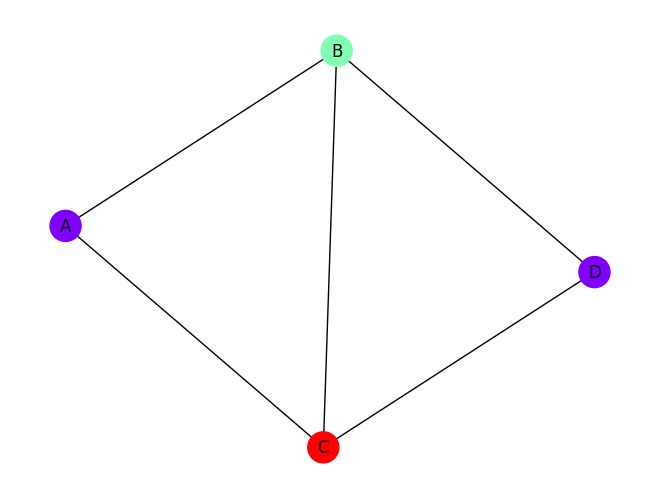

Execution time: 0.4877302646636963 seconds


In [2]:
graph2 = {
    'A': ['B', 'C'],
    'B': ['A', 'C', 'D'],
    'C': ['A', 'B', 'D'],
    'D': ['B', 'C']
}

start_time = time.time()
best_colors, best_fitness = pso_coloring(graph2, swarm_size=30, num_iters=3000)
end_time = time.time()

# Iscrtavanje grafa sa najboljim bojenjem
plot_graph(graph2, best_colors)

elapsed_time = end_time - start_time
print("Execution time:", elapsed_time, "seconds")

Iteracija 1
Čvor A dodeljena boja: 0
Čvor B dodeljena boja: 1
Čvor C dodeljena boja: 2
Čvor D dodeljena boja: 0
Čvor A dodeljena boja: 0
Čvor B dodeljena boja: 1
Čvor C dodeljena boja: 2
Čvor D dodeljena boja: 0
Čvor A dodeljena boja: 0
Čvor B dodeljena boja: 1
Čvor C dodeljena boja: 2
Čvor D dodeljena boja: 0
Čvor A dodeljena boja: 0
Čvor B dodeljena boja: 1
Čvor C dodeljena boja: 2
Čvor D dodeljena boja: 0
Čvor A dodeljena boja: 0
Čvor B dodeljena boja: 1
Čvor C dodeljena boja: 2
Čvor D dodeljena boja: 0
Čvor A dodeljena boja: 0
Čvor B dodeljena boja: 1
Čvor C dodeljena boja: 2
Čvor D dodeljena boja: 0
Čvor A dodeljena boja: 0
Čvor B dodeljena boja: 1
Čvor C dodeljena boja: 2
Čvor D dodeljena boja: 0
Čvor A dodeljena boja: 0
Čvor B dodeljena boja: 1
Čvor C dodeljena boja: 2
Čvor D dodeljena boja: 0
Čvor A dodeljena boja: 0
Čvor B dodeljena boja: 1
Čvor C dodeljena boja: 2
Čvor D dodeljena boja: 0
Čvor A dodeljena boja: 0
Čvor B dodeljena boja: 1
Čvor C dodeljena boja: 2
Čvor D dodelj

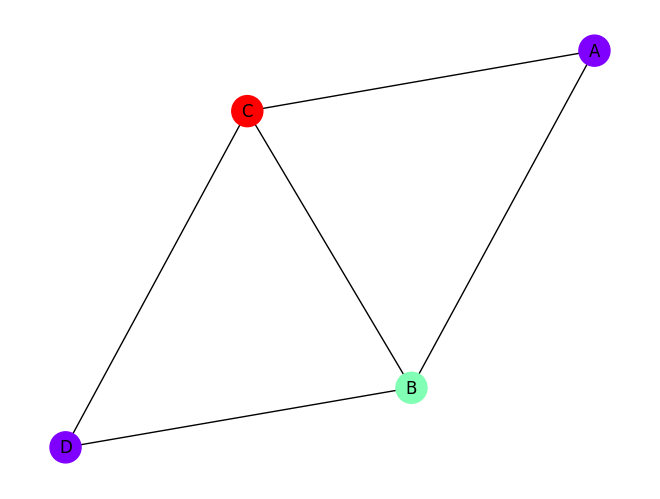

Execution time: 0.4086911678314209 seconds


In [3]:
graph3 = {
    'A': ['B', 'C', 'D'],
    'B': ['A', 'C', 'D', 'E'],
    'C': ['A', 'B', 'D', 'F'],
    'D': ['A', 'B', 'C', 'E', 'F'],
    'E': ['B', 'D', 'G'],
    'F': ['C', 'D', 'H', 'I'],
    'G': ['E', 'J'],
    'H': ['F', 'I'],
    'I': ['F', 'H'],
    'J': ['G']
}

start_time = time.time()
best_colors, best_fitness = pso_coloring(graph2, swarm_size=30, num_iters=3000)
end_time = time.time()

# Iscrtavanje grafa sa najboljim bojenjem
plot_graph(graph2, best_colors)

elapsed_time = end_time - start_time
print("Execution time:", elapsed_time, "seconds")

Iteracija 1
Čvor 1 dodeljena boja: 0
Čvor 2 dodeljena boja: 1
Čvor 3 dodeljena boja: 2
Čvor 4 dodeljena boja: 3
Čvor 5 dodeljena boja: 4
Čvor 6 dodeljena boja: 5
Čvor 7 dodeljena boja: 6
Čvor 8 dodeljena boja: 7
Čvor 9 dodeljena boja: 8
Čvor 10 dodeljena boja: 9
Čvor 11 dodeljena boja: 10
Čvor 12 dodeljena boja: 11
Čvor 13 dodeljena boja: 12
Čvor 14 dodeljena boja: 13
Čvor 15 dodeljena boja: 14
Čvor 16 dodeljena boja: 15
Čvor 33 dodeljena boja: 16
Čvor 36 dodeljena boja: 17
Čvor 41 dodeljena boja: 18
Čvor 43 dodeljena boja: 19
Čvor 45 dodeljena boja: 20
Čvor 47 dodeljena boja: 18
Čvor 48 dodeljena boja: 21
Čvor 51 dodeljena boja: 22
Čvor 54 dodeljena boja: 23
Čvor 56 dodeljena boja: 16
Čvor 57 dodeljena boja: 21
Čvor 59 dodeljena boja: 24
Čvor 60 dodeljena boja: 25
Čvor 61 dodeljena boja: 24
Čvor 70 dodeljena boja: 16
Čvor 71 dodeljena boja: 16
Čvor 72 dodeljena boja: 16
Čvor 73 dodeljena boja: 16
Čvor 74 dodeljena boja: 16
Čvor 75 dodeljena boja: 16
Čvor 76 dodeljena boja: 16
Čvor 77 

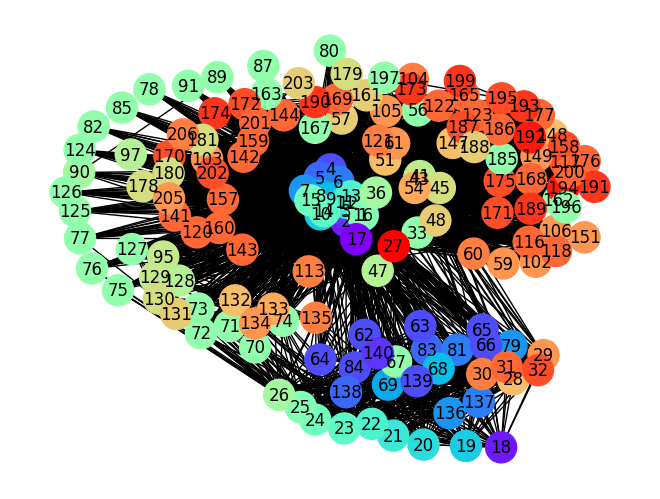

Execution time: 49.04910707473755 seconds


In [4]:
graph = nx.Graph()
with open('../File/fajl2.txt', 'r') as file:
    for line in file:
        parts = line.split()
        if parts[0] == 'e':
            graph.add_edge(int(parts[1]), int(parts[2]))
            
start_time = time.time()   
best_colors, best_fitness = pso_coloring(graph, swarm_size=30, num_iters=3000)
end_time = time.time()

# Iscrtavanje grafa sa najboljim bojenjem
plot_graph(graph, best_colors)

elapsed_time = end_time - start_time
print("Execution time:", elapsed_time, "seconds")

Iteracija 1
Čvor 1 dodeljena boja: 0
Čvor 2 dodeljena boja: 1
Čvor 4 dodeljena boja: 1
Čvor 7 dodeljena boja: 1
Čvor 9 dodeljena boja: 1
Čvor 13 dodeljena boja: 1
Čvor 15 dodeljena boja: 1
Čvor 18 dodeljena boja: 1
Čvor 20 dodeljena boja: 1
Čvor 25 dodeljena boja: 1
Čvor 27 dodeljena boja: 1
Čvor 30 dodeljena boja: 1
Čvor 32 dodeljena boja: 1
Čvor 36 dodeljena boja: 1
Čvor 38 dodeljena boja: 1
Čvor 41 dodeljena boja: 1
Čvor 43 dodeljena boja: 1
Čvor 49 dodeljena boja: 1
Čvor 51 dodeljena boja: 1
Čvor 54 dodeljena boja: 1
Čvor 56 dodeljena boja: 1
Čvor 60 dodeljena boja: 1
Čvor 62 dodeljena boja: 1
Čvor 65 dodeljena boja: 1
Čvor 67 dodeljena boja: 1
Čvor 72 dodeljena boja: 1
Čvor 74 dodeljena boja: 1
Čvor 77 dodeljena boja: 1
Čvor 79 dodeljena boja: 1
Čvor 83 dodeljena boja: 1
Čvor 85 dodeljena boja: 1
Čvor 88 dodeljena boja: 1
Čvor 90 dodeljena boja: 1
Čvor 97 dodeljena boja: 1
Čvor 99 dodeljena boja: 1
Čvor 102 dodeljena boja: 1
Čvor 104 dodeljena boja: 1
Čvor 108 dodeljena boja: 1
Čv

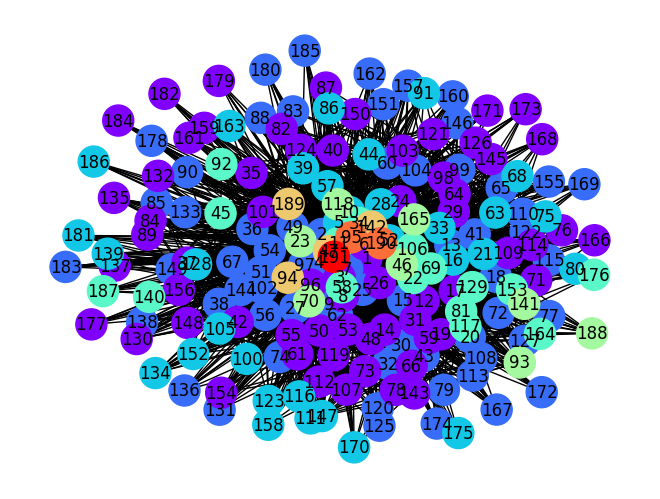

Execution time: 13.594102621078491 seconds


In [5]:
graph = nx.Graph()
with open('../File/myciel7.txt', 'r') as file:
    for line in file:
        parts = line.split()
        if parts[0] == 'e':
            graph.add_edge(int(parts[1]), int(parts[2]))

start_time = time.time() 
best_colors, best_fitness = pso_coloring(graph, swarm_size=30, num_iters=1000)
end_time = time.time()

# Iscrtavanje grafa sa najboljim bojenjem
plot_graph(graph, best_colors)

elapsed_time = end_time - start_time
print("Execution time:", elapsed_time, "seconds")

Iteracija 1
Čvor 1 dodeljena boja: 0
Čvor 16 dodeljena boja: 1
Čvor 20 dodeljena boja: 1
Čvor 94 dodeljena boja: 2
Čvor 80 dodeljena boja: 3
Čvor 57 dodeljena boja: 3
Čvor 62 dodeljena boja: 4
Čvor 89 dodeljena boja: 2
Čvor 113 dodeljena boja: 4
Čvor 5 dodeljena boja: 1
Čvor 21 dodeljena boja: 1
Čvor 15 dodeljena boja: 1
Čvor 2 dodeljena boja: 0
Čvor 24 dodeljena boja: 1
Čvor 30 dodeljena boja: 2
Čvor 77 dodeljena boja: 3
Čvor 92 dodeljena boja: 4
Čvor 41 dodeljena boja: 1
Čvor 55 dodeljena boja: 3
Čvor 6 dodeljena boja: 2
Čvor 54 dodeljena boja: 5
Čvor 3 dodeljena boja: 0
Čvor 100 dodeljena boja: 1
Čvor 44 dodeljena boja: 1
Čvor 105 dodeljena boja: 2
Čvor 91 dodeljena boja: 3
Čvor 42 dodeljena boja: 4
Čvor 103 dodeljena boja: 5
Čvor 90 dodeljena boja: 6
Čvor 22 dodeljena boja: 7
Čvor 67 dodeljena boja: 8
Čvor 31 dodeljena boja: 1
Čvor 115 dodeljena boja: 1
Čvor 71 dodeljena boja: 2
Čvor 4 dodeljena boja: 0
Čvor 38 dodeljena boja: 2
Čvor 85 dodeljena boja: 2
Čvor 49 dodeljena boja: 1
Č

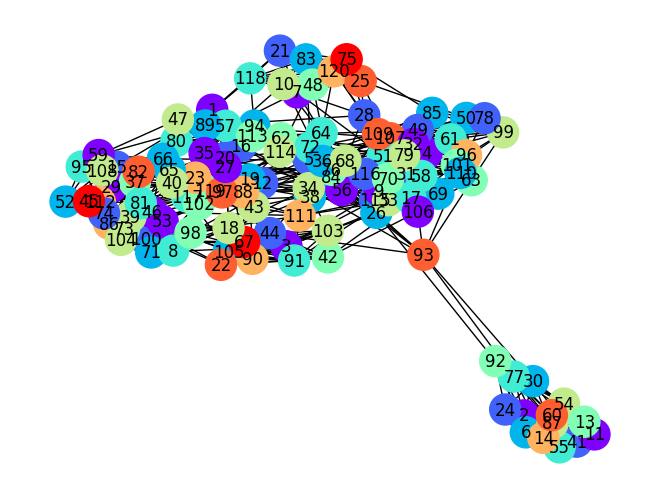

Execution time: 6.13039231300354 seconds


In [6]:
graph = nx.Graph()
with open('../File/games120.txt', 'r') as file:
    for line in file:
        parts = line.split()
        if parts[0] == 'e':
            graph.add_edge(int(parts[1]), int(parts[2]))
            
start_time = time.time()       
best_colors, best_fitness = pso_coloring(graph, swarm_size=30, num_iters=1000)
end_time = time.time()

# Iscrtavanje grafa sa najboljim bojenjem
plot_graph(graph, best_colors)

elapsed_time = end_time - start_time
print("Execution time:", elapsed_time, "seconds")

Iteracija 1
Čvor 0 dodeljena boja: 0
Čvor 1 dodeljena boja: 1
Čvor 2 dodeljena boja: 2
Čvor 3 dodeljena boja: 3
Čvor 4 dodeljena boja: 4
Čvor 5 dodeljena boja: 5
Čvor 6 dodeljena boja: 6
Čvor 7 dodeljena boja: 7
Čvor 8 dodeljena boja: 8
Čvor 9 dodeljena boja: 9
Čvor 10 dodeljena boja: 10
Čvor 11 dodeljena boja: 11
Čvor 12 dodeljena boja: 12
Čvor 13 dodeljena boja: 13
Čvor 14 dodeljena boja: 14
Čvor 15 dodeljena boja: 15
Čvor 16 dodeljena boja: 16
Čvor 17 dodeljena boja: 17
Čvor 18 dodeljena boja: 18
Čvor 19 dodeljena boja: 19
Čvor 20 dodeljena boja: 20
Čvor 21 dodeljena boja: 21
Čvor 22 dodeljena boja: 22
Čvor 23 dodeljena boja: 23
Čvor 24 dodeljena boja: 24
Čvor 25 dodeljena boja: 25
Čvor 26 dodeljena boja: 26
Čvor 27 dodeljena boja: 27
Čvor 28 dodeljena boja: 28
Čvor 29 dodeljena boja: 29
Čvor 0 dodeljena boja: 0
Čvor 1 dodeljena boja: 1
Čvor 2 dodeljena boja: 2
Čvor 3 dodeljena boja: 3
Čvor 4 dodeljena boja: 4
Čvor 5 dodeljena boja: 5
Čvor 6 dodeljena boja: 6
Čvor 7 dodeljena boja: 

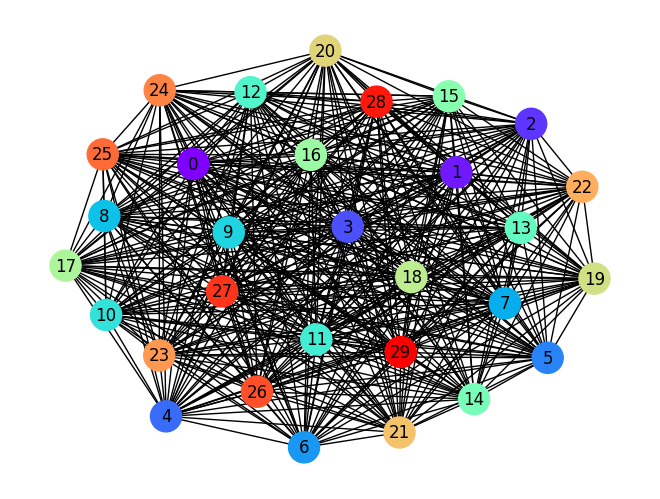

Execution time: 3.54166316986084 seconds


In [7]:
graph = nx.complete_graph(30)

start_time = time.time()       
best_colors, best_fitness = pso_coloring(graph, swarm_size=30, num_iters=1000)
end_time = time.time()

# Iscrtavanje grafa sa najboljim bojenjem
plot_graph(graph, best_colors)

elapsed_time = end_time - start_time
print("Execution time:", elapsed_time, "seconds")